In [1]:
# Import necessory packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv('C:\\Users\\farad\\onedrive\\desktop\\candy-data.txt')

# Summary

We can have 2 different approaches in this problem: 
1) Look at the sucessful businesses to see what parameters did they use. In Data Visualization section, I will consider this approach.
2) Look at each parameter and win% to suggest the best ones. In Statistical Analysis and Modeling sections, I will consider testing it.

# 1. Data Study and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


# 2. Data Visualization

As discussed above, Data Visualization can help to look at the most sucessful business and use their approach.

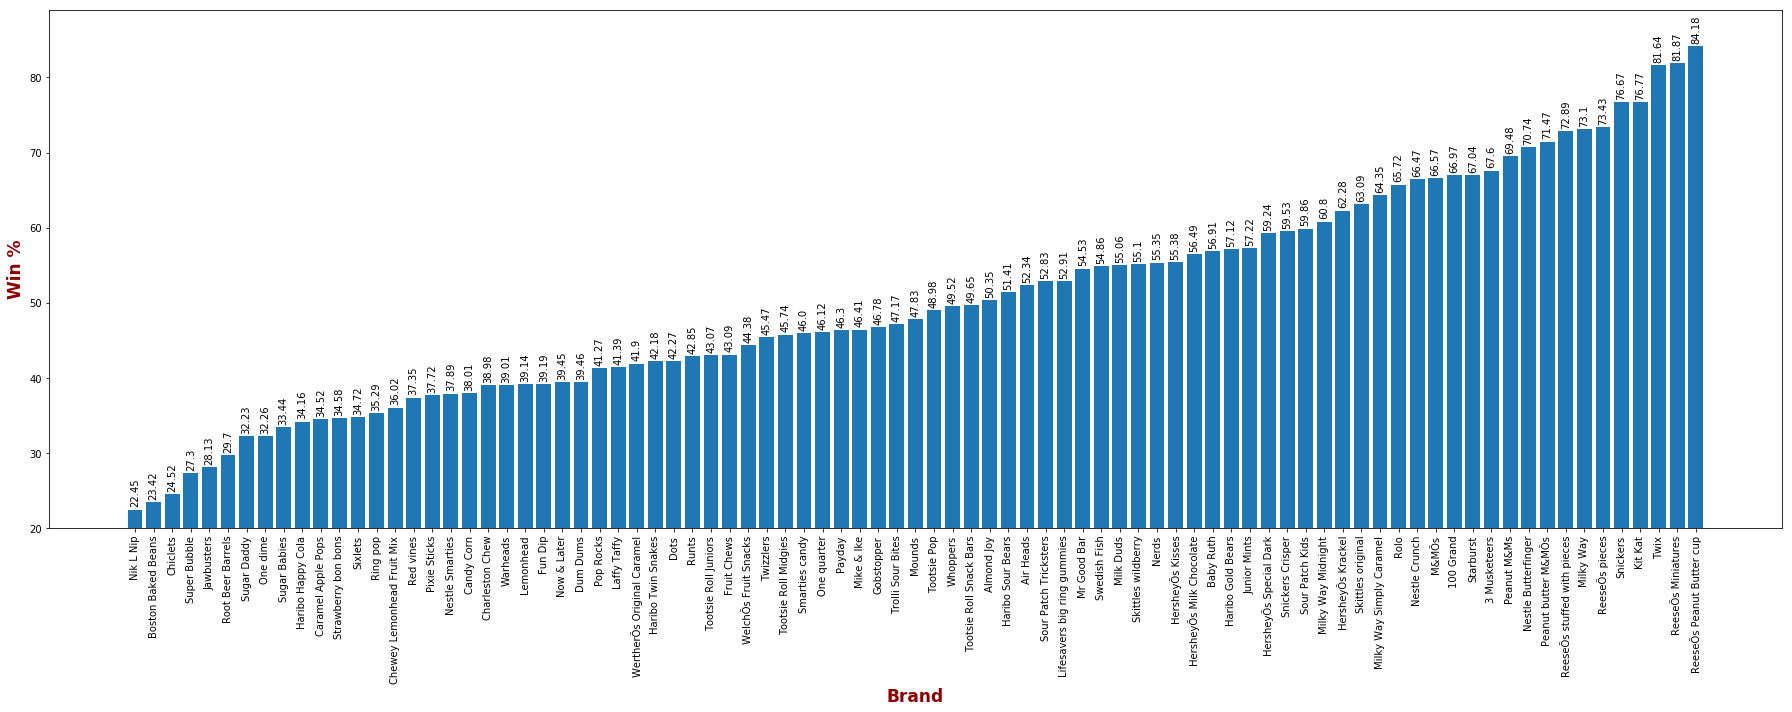

In [4]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(25,10))
df = df.sort_values('winpercent')
y_pos = range(len(df.competitorname))
winsort = round(df.winpercent,2)
rects1 = plt.bar(df.competitorname,winsort)
plt.xticks(y_pos, df.competitorname, rotation=90)
plt.ylabel('Win %', size = '17', color= 'darkred', fontweight='bold')
plt.xlabel('Brand', size = '17', color= 'darkred', fontweight='bold')
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)


autolabel(rects1)
ax.set_ylim(20, 89)
fig.tight_layout()
plt.show()

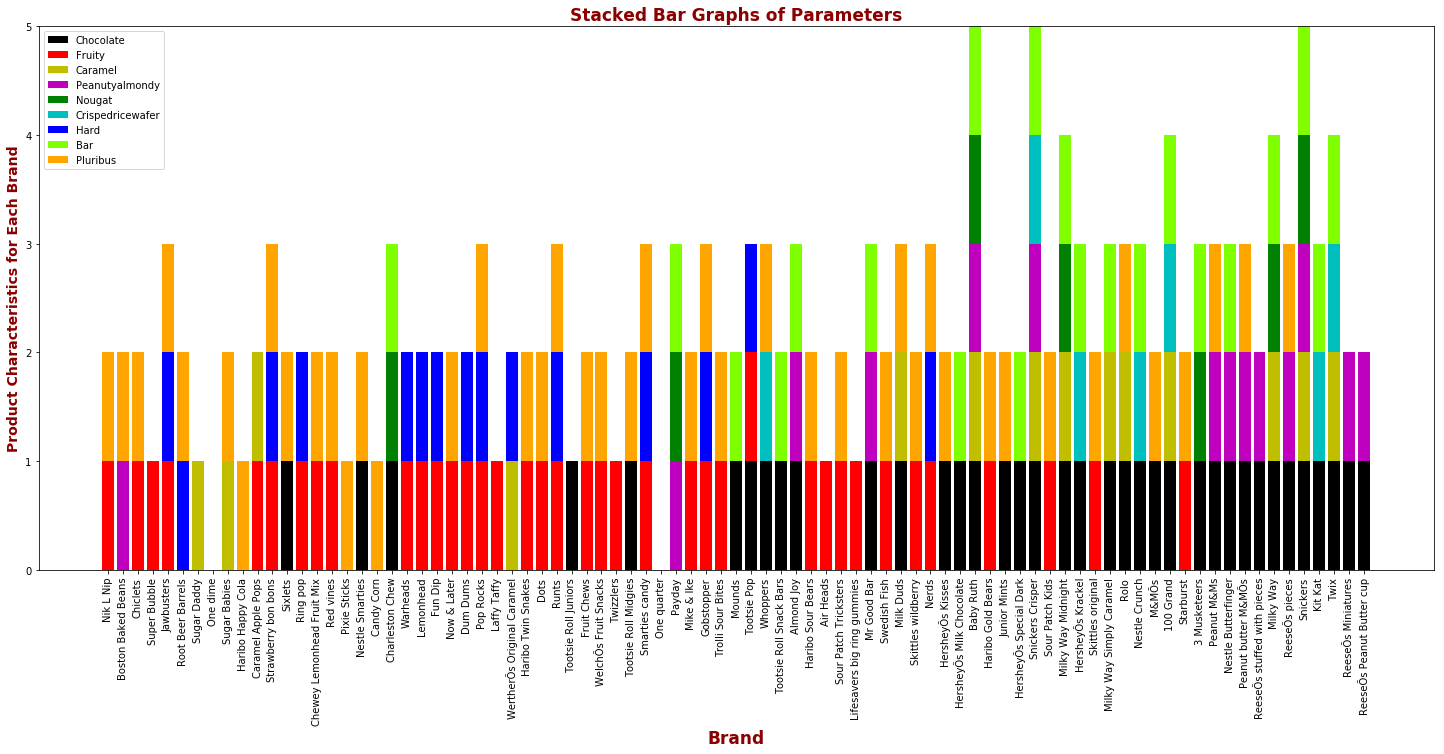

In [5]:
y1 = df.chocolate
y2 = df.fruity
y3 = df.caramel
y4 = df.peanutyalmondy
y5 = df.nougat
y6 = df.crispedricewafer
y7 = df.hard
y8 = df.bar
y9 = df.pluribus
y10 = df.sugarpercent
y11 = df.pricepercent
xvalues = df.competitorname
fig,ax = plt.subplots(figsize=(25,10))
plt.bar(xvalues,y1,color='k', label ='Chocolate')
plt.bar(xvalues,y2, color='r', bottom = y1, label = 'Fruity')
plt.bar(xvalues,y3, color='y', bottom = y1+y2,label = 'Caramel')
plt.bar(xvalues,y4, color='m',  bottom = y1+y2+y3,label = 'Peanutyalmondy')
plt.bar(xvalues,y5, color='g', bottom = y1+y2+y3+y4, label = 'Nougat')
plt.bar(xvalues,y6, color='c',  bottom =y1+y2+y3+y4+y5  ,label = 'Crispedricewafer')
plt.bar(xvalues,y7, color='b', bottom =y1+y2+y3+y4+y5+y6   , label = 'Hard')
plt.bar(xvalues,y8, color='chartreuse', bottom = y1+y2+y3+y4+y5+y6+y7, label = 'Bar')
plt.bar(xvalues,y9, color='orange', bottom = y1+y2+y3+y4+y5+y6+y7+y8, label = 'Pluribus')
#plt.bar(xvalues,y10, color='maroon', bottom = y1+y2+y3+y4+y5+y6+y7+y8+y9, label = 'Sugarpercent')
#plt.bar(xvalues,y11, color='hotpink', bottom = y1+y2+y3+y4+y5+y6+y7+y8+y9+y10, label = 'Pricepercent')

plt.xticks(y_pos, df.competitorname, rotation=90)
plt.xlabel('Brand', size = '17', color= 'darkred', fontweight='bold')
plt.ylabel('Product Characteristics for Each Brand', size = '14', color= 'darkred', fontweight='bold')
plt.title('Stacked Bar Graphs of Parameters', size = '17', color= 'darkred', fontweight='bold')
plt.legend()

# 3. Statiscal Testing
In this section, we realized that using Nougat or not using it, has no effect on Win %. The results of the test is provided below.

In [6]:
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['winpercent'].loc[df.nougat == 0], x2=df['winpercent'].loc[df.nougat == 1], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['winpercent'],df['nougat'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

0.0637949813597319
accept null hypothesis
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    10.6088  -0.7746 21.9922 False 
---------------------------------------------
[0 1]


# 4. Modeling

3 models are provided below. 
1) heatmap chart: it shows the relationship between each parameter and Win %. Result shows that using chocolate has more influence in win%.
2) Backward Elimination: It eliminates the next worst parameter one by one. We concluded that chocolate, fruity and peanutyalmondy ones have the highest win %.
3) Linear Regression: It uses the linear regression for testing the best ones. However, linear regression may not be a great fit, so it should be considered with other models. In this model, these parameters have the highest impact: chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, pluribus, sugarpercent, pricepercent.
4) Lasso Regression: It is most accurate model, and it says if a parameter has positive or negative impact on the result. also it will rank each parameter based on the highest impact. The best parameters are as follow and their positive or negative impact is provided in the chart: chocolate, fruity, caramel, peanutyalmondy, crispedricewafer, hard, sugarpercent.

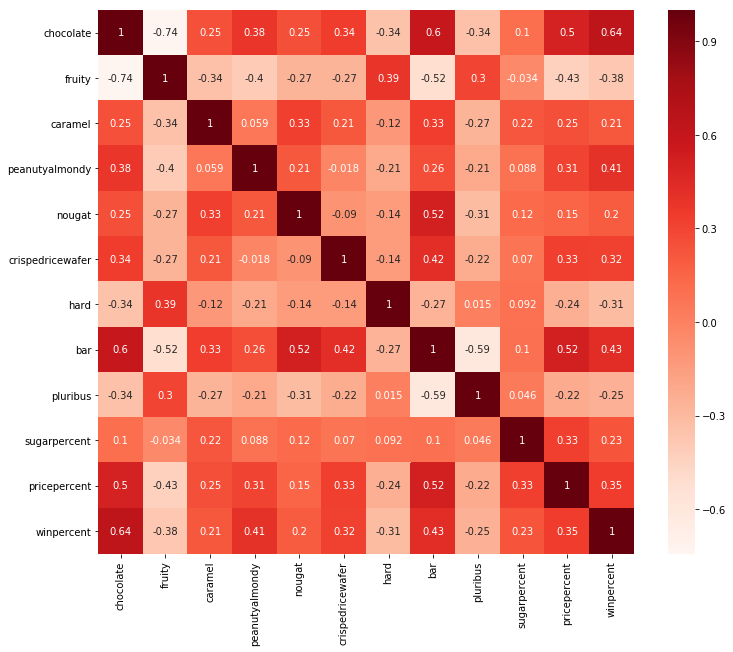

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 3.1. Filter Method

In [8]:
#Correlation with output variable
cor_target = abs(cor["winpercent"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

chocolate     0.636517
winpercent    1.000000
Name: winpercent, dtype: float64

### 3.2. Wrapper Method

##### 3.2.1. Backward Elimination

In [9]:
X = df.drop(['winpercent','competitorname'],1)   #Feature Matrix
y = df['winpercent']          #Target Variable

In [10]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X.astype(float))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const               1.444217e-11
chocolate           2.962842e-06
fruity              1.451657e-02
caramel             5.449294e-01
peanutyalmondy      6.811194e-03
nougat              8.884904e-01
crispedricewafer    9.470290e-02
hard                7.851525e-02
bar                 9.307175e-01
pluribus            7.794487e-01
sugarpercent        5.499517e-02
pricepercent        2.857840e-01
dtype: float64

In [11]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['chocolate', 'fruity', 'peanutyalmondy']


##### 3.2.2. Linear Regression

In [12]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True  True False False  True  True]
[1 1 2 1 3 1 1 5 4 1 1]


In [13]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.418278


In [14]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'pluribus', 'sugarpercent', 'pricepercent'],
      dtype='object')


##### 3.2.3. Lasso Regression

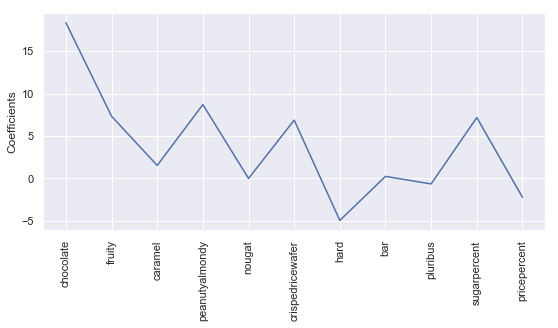

In [15]:
# Lasso Technique for Feature Selection
sns.set()
fig,ax = plt.subplots(figsize=(9,4))
from sklearn.linear_model import Lasso
names = df.drop(['winpercent','competitorname'],1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()

In [16]:
# Seeing above chart in a table
# I use the previous figure to determine the parameters to fit the model. then by using p-value, I can determine the best features.
import statsmodels.api as sm
from statsmodels.formula.api import ols
o = ols('winpercent ~ chocolate + fruity + caramel + peanutyalmondy + crispedricewafer + hard + sugarpercent + pricepercent' ,df).fit()
print(o.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     11.09
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           3.03e-10
Time:                        11:00:14   Log-Likelihood:                -315.77
No. Observations:                  85   AIC:                             649.5
Df Residuals:                      76   BIC:                             671.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           33.9778      3.813  

Table 1: Important Parameters in Each of The Models

Model |  Important Parameters 
:---|:---
Heatmap | chocolate
Backward Elimination | chocolate, peanutyalmondy, fruity
Linear Regression | chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, pluribus, sugarpercent, pricepercent
Lasso Regression | chocolate, peanutyalmondy, fruity, crispedricewafer, sugarpercent, caramel

Table 2: Number of Models that Suggests Each Parameter

Parameter | # of Models
:---|:---
chocolate | 4          
fruity | 3             
caramel | 2            
peanutyalmondy | 3   
nougat | 1             
crispedricewafer | 2  
hard  | 1 (- impact)             
bar  | 0               
pluribus | 1           
sugarpercent  | 2     
pricepercent | 1 (- impact)